In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [157]:
#a
x=sym.Symbol('x',real=True)
y=sym.Symbol('y',real=True)


In [158]:
#b

z= x+sym.I*y
z


x + I*y

In [159]:
#c

func=z**3 - 1
    

In [160]:
#d

F=[sym.re(func), sym.im(func)]
F
sym.diff(F[0],x)

   


3*x**2 - 3*y**2

In [161]:
#e
def GetJacobian(G,h=1e-6):
    
    dim = len(G)
    
    J = sym.matrices.Matrix([[0,0],[0,0]])
    
    J[0,0]=sym.diff(G[0],x,1)
    J[0,1]=sym.diff(G[0],y,1)
    J[1,0]=sym.diff(G[1],x,1)
    J[1,1]=sym.diff(G[1],y,1)
    
    return J

In [162]:
J=GetJacobian(F)
J

Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

In [163]:
#f

Fn=sym.lambdify([x,y],F,'numpy')
Jn=sym.lambdify([x,y],J,'numpy')
np.linalg.inv(Jn(0.5,0.5))

array([[ 0.        ,  0.66666667],
       [-0.66666667, -0.        ]])

In [164]:
#g
def Raiz_poly(z_o,Fn,Jn):
    
    error=4
    n=0
    zn_=z_o
    
    while error > 10e-7:
        
        J_inv=np.linalg.inv(Jn(zn_[0],zn_[1]))
        zn=zn_ - np.dot(J_inv,Fn(zn_[0],zn_[1]))
       # print(zn_)
        error= np.linalg.norm(zn-zn_)
        zn_=zn
        #print(zn)
        
        
    return zn_

In [165]:
#h

r1=Raiz_poly([0.5,0.5],Fn,Jn)
r1

array([-0.5      ,  0.8660254])

In [186]:
#i
N=300
x=np.linspace(-1,1,N)
y=np.linspace(-1,1,N)
r2=np.array([-0.5,-1*r1[1]])
r3=np.array([1,0])
raices=np.array([r1,r2,r3])

In [187]:
#j
Fractal=np.zeros((N,N),np.int64)


In [188]:
for i in range(len(x)):
    for j in range(len(y)):
        raiz=Raiz_poly([x[i],y[j]],Fn,Jn)
        norm1=np.linalg.norm(raiz-raices[0])
        norm2=np.linalg.norm(raiz-raices[1])
        norm3=np.linalg.norm(raiz-raices[2])
        if norm1<norm2 and norm1<norm3:
            color=20
            Fractal[i,j]=color
            
        if norm2<norm1 and norm2<norm3:
            color=100
            Fractal[i,j]=color
        
        if norm3<norm2 and norm3<norm1:
            color=255
            Fractal[i,j]=color

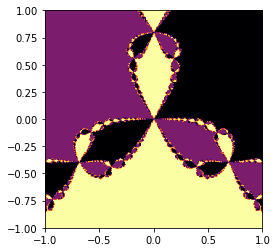

In [189]:
#k
plt.imshow(Fractal,cmap='inferno',extent=[-1,1,-1,1])